In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_json("messages.json")


today = pd.Timestamp("2026-02-16")  # set this to the scrape/run date


def normalize_ts(value: str) -> str | None:
    if not value:
        return None
    value = value.strip()
    if value.startswith("Today "):
        t = value.replace("Today ", "")
        dt = pd.to_datetime(f"{today.date()} {t}")
    elif value.startswith("Yesterday "):
        t = value.replace("Yesterday ", "")
        dt = pd.to_datetime(f"{(today - pd.Timedelta(days=1)).date()} {t}")
    else:
        # fall back to parsing known full dates like "16 Feb 2026 13:00"
        dt = pd.to_datetime(value, dayfirst=True, errors="coerce")
    return dt.strftime("%d %b %Y %H:%M") if pd.notna(dt) else None


df["timestamp"] = df["timestamp"].apply(normalize_ts)

display(df.head(100))

,symbol,timestamp,message
0,VLRM.PL,16 Feb 2026 13:00,Hahaha - the twisted traders and their tripe a...
1,VLRM.PL,16 Feb 2026 12:57,"Nice one BashM, thank you again."
2,VLRM.PL,16 Feb 2026 12:56,"Well done BashM, you are brilliant, thank you."
3,VLRM.PL,16 Feb 2026 12:53,24 million warrants will be held on to tightly...
4,VLRM.PL,16 Feb 2026 12:51,We've\n got the US Non Executive Director on b...
...,...,...,...
95,VLRM.PL,10 Feb 2026 12:55,"In the complex world of mining finance, royalt..."
96,VLRM.PL,10 Feb 2026 12:54,"\Yes, they are, read the link in full and try ..."
97,VLRM.PL,10 Feb 2026 12:52,"<a href=""Https://discoveryalert.com.au/royalty..."
98,VLRM.PL,10 Feb 2026 12:48,"Wrong again, you need to read about royalty an..."


Text(0.5, 1.0, 'Posts by hour (24h)')

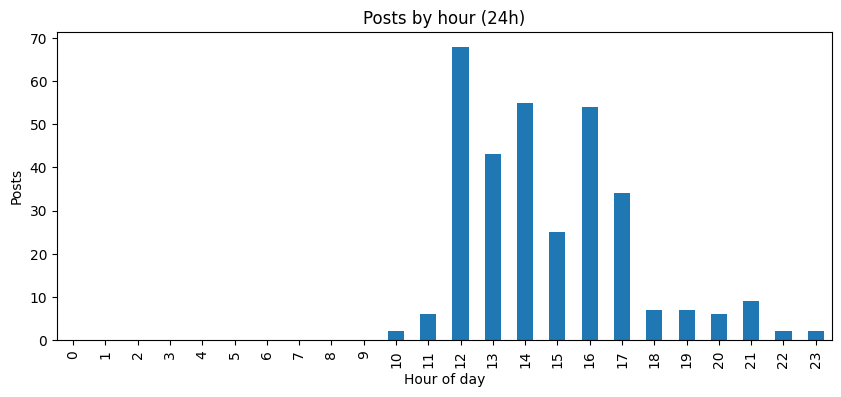

In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

hourly = (
    df.dropna(subset=["timestamp"])
      .assign(hour=df["timestamp"].dt.hour)
      .groupby("hour")
      .size()
      .reindex(range(24), fill_value=0)
)

ax = hourly.plot(kind="bar", figsize=(10, 4))
ax.set_xlabel("Hour of day")
ax.set_ylabel("Posts")
ax.set_title("Posts by hour (24h)")

In [6]:
# split the messages into before and after 28th Jan 2026
cutoff = pd.Timestamp("2026-01-28")
before = df[df["timestamp"] < cutoff]
after = df[df["timestamp"] >= cutoff]

In [7]:
display(before.head())
display(after.head())

,symbol,timestamp,message
190,VLRM.PL,2026-01-23 15:04:00,GoldenGod is only interested in discrediting V...
191,VLRM.PL,2026-01-23 13:49:00,Valereum own the bond and on maturity get the ...
192,VLRM.PL,2026-01-23 13:48:00,I don't use Chatgpt. I use Google AI. It was...
193,VLRM.PL,2026-01-23 13:39:00,Valereum are the legal beneficial owners of th...
194,VLRM.PL,2025-12-08 16:34:00,You agree that you will:\n<br/><br/>only publi...


,symbol,timestamp,message
0,VLRM.PL,2026-02-16 13:00:00,Hahaha - the twisted traders and their tripe a...
1,VLRM.PL,2026-02-16 12:57:00,"Nice one BashM, thank you again."
2,VLRM.PL,2026-02-16 12:56:00,"Well done BashM, you are brilliant, thank you."
3,VLRM.PL,2026-02-16 12:53:00,24 million warrants will be held on to tightly...
4,VLRM.PL,2026-02-16 12:51:00,We've\n got the US Non Executive Director on b...


Text(0.5, 1.0, 'Pre 28th Jan 2026 Posts by hour (24h)')

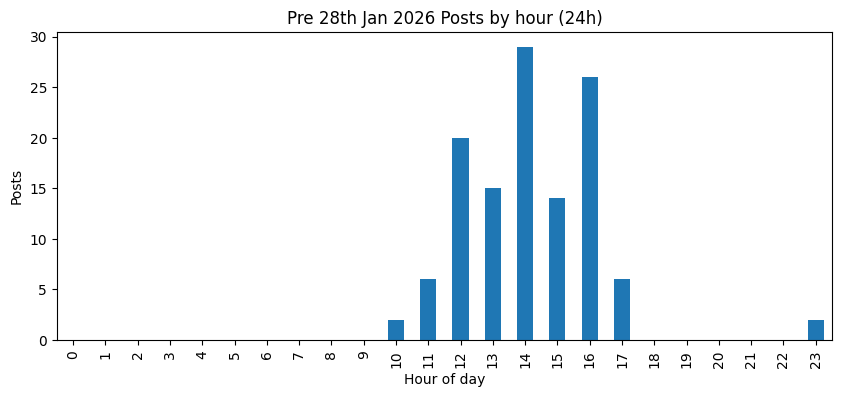

In [8]:
hourly_before = (
    before.dropna(subset=["timestamp"])
      .assign(hour=before["timestamp"].dt.hour)
      .groupby("hour")
      .size()
      .reindex(range(24), fill_value=0)
)

ax = hourly_before.plot(kind="bar", figsize=(10, 4))
ax.set_xlabel("Hour of day")
ax.set_ylabel("Posts")
ax.set_title("Pre 28th Jan 2026 Posts by hour (24h)")

Text(0.5, 1.0, 'Post 28th Jan 2026 Posts by hour (24h)')

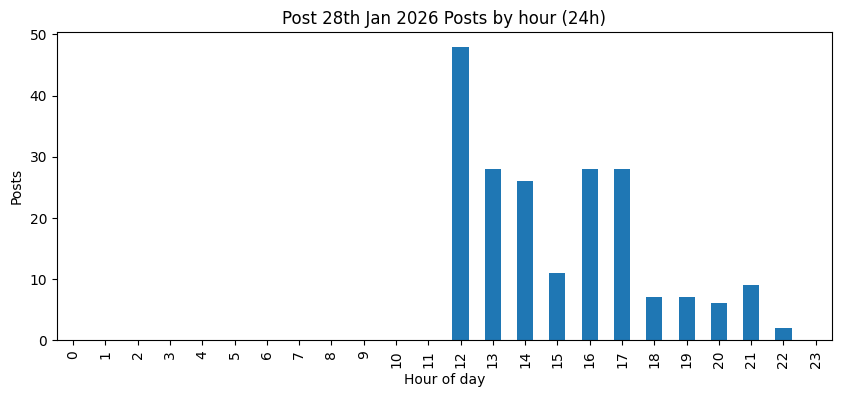

In [9]:
hourly_after = (
    after.dropna(subset=["timestamp"])
      .assign(hour=after["timestamp"].dt.hour)
      .groupby("hour")
      .size()
      .reindex(range(24), fill_value=0)
)

ax = hourly_after.plot(kind="bar", figsize=(10, 4))
ax.set_xlabel("Hour of day")
ax.set_ylabel("Posts")
ax.set_title("Post 28th Jan 2026 Posts by hour (24h)")

In [10]:
symbols = df['symbol'].dropna().unique()
print(symbols)

['VLRM.PL' 'ALRT' 'SML' 'KDNC']


In [11]:
# average post time for hourly before and after cutoff
avg_time_before = before["timestamp"].dropna().dt.hour.mean()
avg_time_after = after["timestamp"].dropna().dt.hour.mean()
print(f"Average post hour before cutoff: {avg_time_before:.2f}")
print(f"Average post hour after cutoff: {avg_time_after:.2f}")

Average post hour before cutoff: 14.18
Average post hour after cutoff: 15.03


Average posts per day before cutoff: 9.23
Average posts per day after cutoff: 13.33


(array([20485., 20487., 20489., 20491., 20493., 20495., 20497., 20499.]),
 [Text(20485.0, 0, '2026-02-01'),
  Text(20487.0, 0, '2026-02-03'),
  Text(20489.0, 0, '2026-02-05'),
  Text(20491.0, 0, '2026-02-07'),
  Text(20493.0, 0, '2026-02-09'),
  Text(20495.0, 0, '2026-02-11'),
  Text(20497.0, 0, '2026-02-13'),
  Text(20499.0, 0, '2026-02-15')])

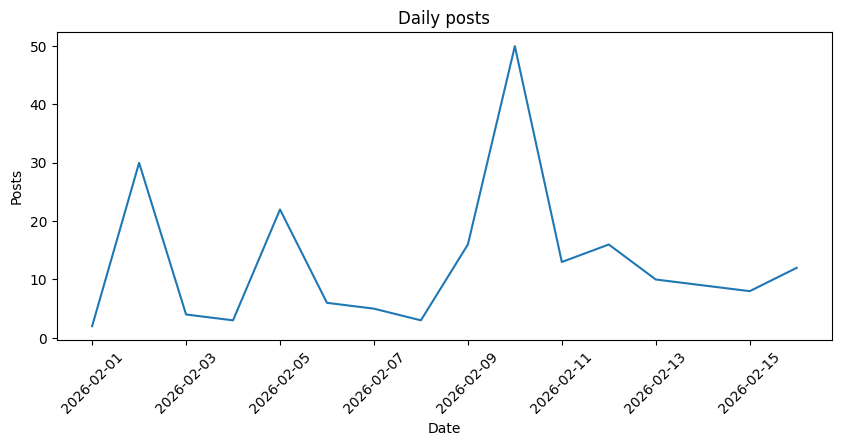

In [14]:
# posts per day before and after cutoff
daily_before = (
    before.dropna(subset=["timestamp"])
      .assign(date=before["timestamp"].dt.date)
      .groupby("date")
      .size()
)
daily_after = (
    after.dropna(subset=["timestamp"])
      .assign(date=after["timestamp"].dt.date)
        .groupby("date")
).size()
print(f"Average posts per day before cutoff: {daily_before.mean():.2f}")
print(f"Average posts per day after cutoff: {daily_after.mean():.2f}")

# plot daily posts after cutoff
ax = daily_after.plot(kind="line", figsize=(10, 4))
ax.set_xlabel("Date")
ax.set_ylabel("Posts")
ax.set_title("Daily posts")
plt.xticks(rotation=45)